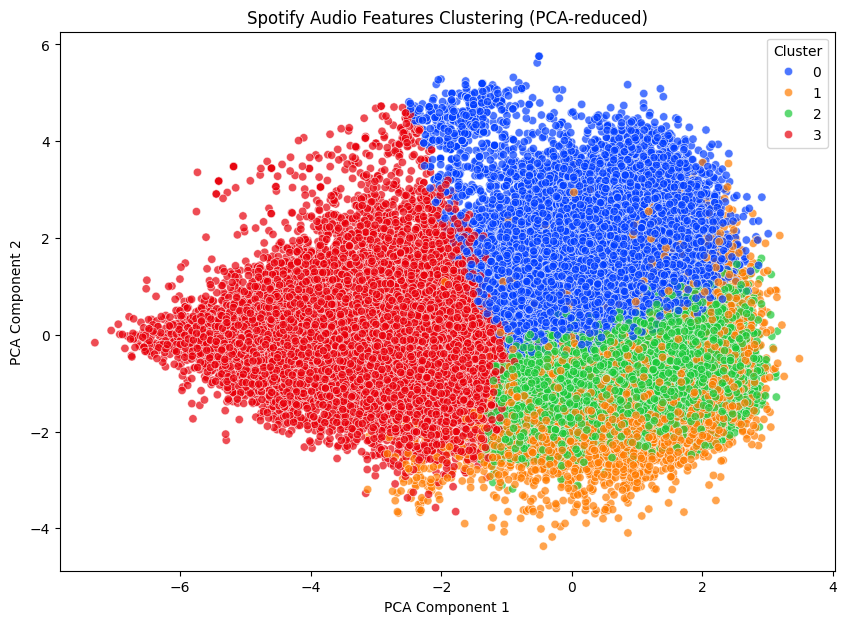

Cluster moods:
Cluster 0: Intense / Aggressive
Cluster 1: Mellow / Sad
Cluster 2: Energetic / Happy
Cluster 3: Mellow / Sad


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your CSV path)
df = pd.read_csv("C:/Users/puppa/OneDrive/Documents/SpotifyAudioFeaturesApril2019.csv")

# Select relevant audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

X = df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality reduction with PCA to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering (choose number of clusters, e.g., 4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters and PCA results to dataframe
df['cluster'] = clusters
df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]

# Visualize clusters in PCA 2D space
plt.figure(figsize=(10, 7))
palette = sns.color_palette("bright", k)
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df, palette=palette, alpha=0.7)
plt.title('Spotify Audio Features Clustering (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# Map clusters to mood labels based on feature averages (example)
cluster_moods = {}

for c in range(k):
    cluster_data = df[df['cluster'] == c]
    avg_valence = cluster_data['valence'].mean()
    avg_energy = cluster_data['energy'].mean()
    if avg_valence > 0.6 and avg_energy > 0.6:
        mood = 'Energetic / Happy'
    elif avg_valence < 0.4 and avg_energy > 0.6:
        mood = 'Intense / Aggressive'
    elif avg_valence > 0.6 and avg_energy < 0.4:
        mood = 'Calm / Relaxed'
    else:
        mood = 'Mellow / Sad'
    cluster_moods[c] = mood

print("Cluster moods:")
for c, mood in cluster_moods.items():
    print(f"Cluster {c}: {mood}")

# Add mood labels to dataframe
df['mood'] = df['cluster'].map(cluster_moods)



In [5]:
# Example: Function to generate a playlist based on mood
def generate_playlist(mood_label, num_songs=10):
    playlist = df[df['mood'] == mood_label].sample(num_songs)
    return playlist[['track_name', 'artist_name', 'mood']]

# Example usage:
print("\nSample Playlist for 'Energetic / Happy' mood:\n")
print(generate_playlist('Energetic / Happy', 5))


Sample Playlist for 'Energetic / Happy' mood:

                                               track_name       artist_name  \
44892   A State Of Trance (ASOT 855) - Track Recap, Pt. 1  Armin van Buuren   
109041                                             Flabby           Fishman   
41184                                            Too Easy      Beacon Light   
38405                         Good Day - From "Early Man"     New Hope Club   
86064                                        How It Feels  Jontavian Barber   

                     mood  
44892   Energetic / Happy  
109041  Energetic / Happy  
41184   Energetic / Happy  
38405   Energetic / Happy  
86064   Energetic / Happy  
